Optimization terminated successfully    (Exit mode 0)
            Current function value: 342999.55832593626
            Iterations: 146
            Function evaluations: 15106
            Gradient evaluations: 146
Energy: 342999.558326


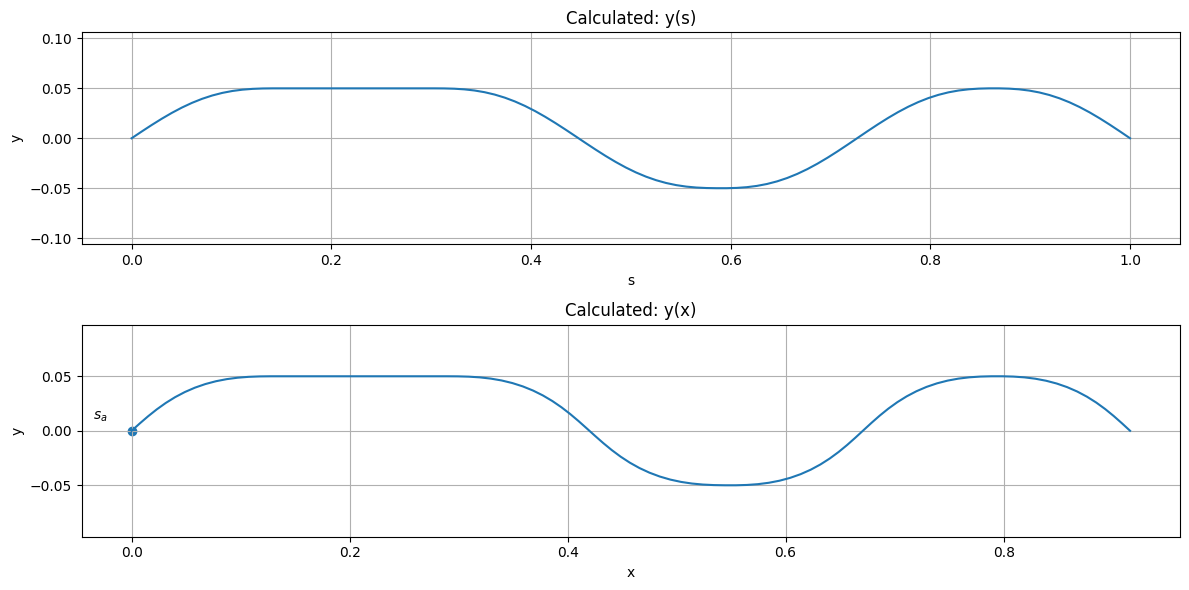

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def compute_xy_from_y_ds(y_coords, ds, x_s_a=0, y_s_a=0):
    """
    Given y-coordinates and arc length spacing ds, compute x and y assuming arc-length spacing.
    Returns x, y starting from (x_s_a, y_s_a).
    """
    y_coords = np.array(y_coords)
    y = y_coords + y_s_a  # offset y if needed
    x = [x_s_a]

    for i in range(1, len(y)):
        dy = y[i] - y[i - 1]
        dx = np.sqrt(max(ds**2 - dy**2, 0))
        x.append(x[-1] + dx)

    return np.array(x), y

def plot_xy_from_y_ds(y_coords2, ds2, x_s_a=0, y_s_a=0):
    """
    Compare two sets of y-coordinates generated with arc length spacing:
    - Left: initial guess (y_coords1, ds1)
    - Right: calculated (y_coords2, ds2)
    """
    x2, y2 = compute_xy_from_y_ds(y_coords2, ds2, x_s_a, y_s_a)

    s2 = np.arange(len(y2)) * ds2

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    # Right: calculated
    axs[0].plot(s2, y2)
    axs[0].set_title("Calculated: y(s)")
    axs[0].set_xlabel("s")
    axs[0].set_ylabel("y")
    axs[0].grid()
    axs[0].axis('equal')

    axs[1].plot(x2, y2)
    axs[1].set_title("Calculated: y(x)")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y")
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].scatter(x_s_a, y_s_a)
    axs[1].annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a - 0.035, y_s_a + 0.01))

    plt.tight_layout()
    plt.show()

def beam_energy(y, ds, E, I_b, Tx):
    n = len(y)

    sum1 = 0
    for i in range(n - 2):
        sum1 += (y[i+2] - 2*y[i+1] + y[i])**2 / ds**2

    sum2 = 0
    for i in range(n - 1):
        dy = (y[i+1] - y[i]) / 2
        sum2 += np.cos(dy)

    V = E * I_b * sum1 + Tx * (1 - sum2)
    return V

# Parameters
E = 1
I_b = 1
Tx = -3500
length = 1
n = 100
h = 0.05
s, ds = np.linspace(0, length, n, retstep=True)

# Initial guess: parabolic shape
y0 = np.ones(n)

# Optimization
sol = minimize(
    beam_energy,
    y0,
    args=(ds, E, I_b, Tx),
    constraints=([
        {"type": "eq", "fun": lambda y: y[0]},
        {"type": "eq", "fun": lambda y: y[-1]},
    ]),
    options={"maxiter": 300, "disp": True},
    bounds=tuple((-h, h) for _ in range(n))
)

y_min = sol.x

print("Energy:", round(beam_energy(y_min, ds, E, I_b, Tx), 6))
plot_xy_from_y_ds(y_min, ds)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -10763.858996167295
            Iterations: 5
            Function evaluations: 101
            Gradient evaluations: 1
Tx:  -1000


C:\Users\vangr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(
C:\Users\vangr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(
C:\Users\vangr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\animation.py:171

IndexError: list index out of range

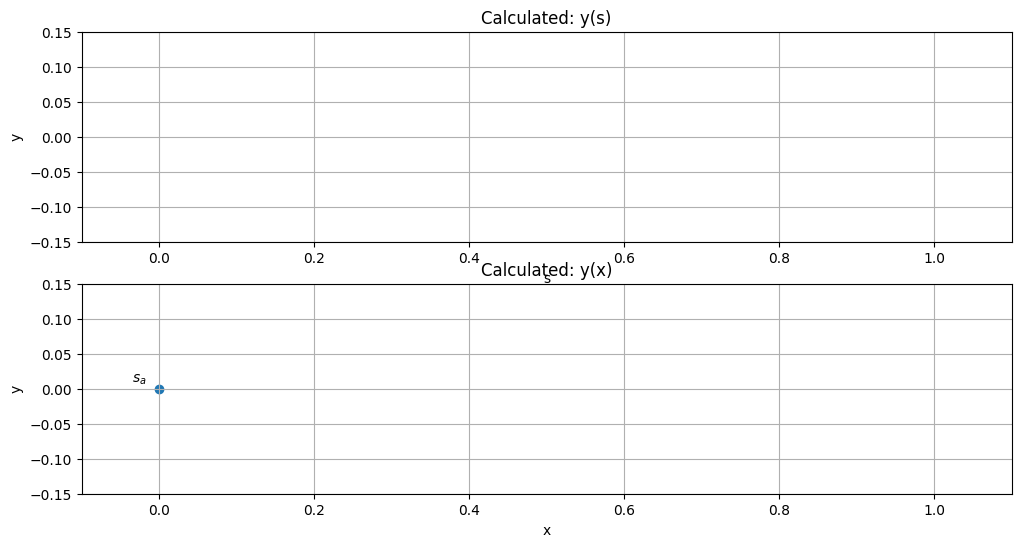

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize
from IPython.display import HTML, Math, display
from matplotlib.animation import PillowWriter
import random


frames = []
Txs = []

def compute_xy_from_y_ds(y_coords, ds, x_s_a=0, y_s_a=0):
    y_coords = np.array(y_coords)
    y = y_coords + y_s_a  # offset y if needed
    x = [x_s_a]

    for i in range(1, len(y)):
        dy = y[i] - y[i - 1]
        dx = np.sqrt(max(ds**2 - dy**2, 0))
        x.append(x[-1] + dx)
    
    return np.array(x), y

def beam_energy(y, ds, E, I_b, Tx):
    n = len(y)

    sum1 = 0
    for i in range(n - 2):
        sum1 += (y[i+2] - 2*y[i+1] + y[i])**2 / ds**2

    sum2 = 0
    for i in range(n - 1):
        dy = (y[i+1] - y[i]) / ds
        sum2 += np.cos(dy)

    V = E * I_b * sum1 + Tx * sum2
    return V
   
# Parameters
E = 1
I_b = 1
Tx = -1000
length = 1
n = 100
h = 0.05
s, ds = np.linspace(0, length, n, retstep=True)

y0 = np.array([random.uniform(-h, h) for _ in range(n)])

while True:
    sol = minimize(
        beam_energy,
        y0,
        args=(ds, E, I_b, Tx),
        constraints=([
            {"type": "eq", "fun": lambda y: y[0]},
            {"type": "eq", "fun": lambda y: y[-1]},
        ]),
        options={"maxiter": 300, "disp": True},
        bounds=tuple((-h, h) for _ in range(n))
    )

    print("Tx: ", Tx)

    if not sol.success or Tx<-1100:
        break

    y = sol.x
    x, y = compute_xy_from_y_ds(y, ds, 0, 0)

    frames.append(((s, y), (x, y))) 
    Txs.append(Tx)
    Tx-=1
    y0 = y.copy()

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

# Right: calculated
line1, = axs[0].plot([], [])
axs[0].set_title("Calculated: y(s)")
axs[0].set_xlabel("s")
axs[0].set_ylabel("y")
axs[0].grid()
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylim(-h - 0.1, h + 0.1)


line2, = axs[1].plot([], [])
axs[1].set_title("Calculated: y(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].grid()
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-h - 0.1, h + 0.1)
axs[1].scatter(0, 0)
axs[1].annotate("$s_a$", (0, 0), xytext=(- 0.035, + 0.01))
text = axs[1].text(0.05, 0.9, "", fontsize=20, transform=axs[1].transAxes)

def update(frame):
    (s_y, x_y) = frames[frame]
    s, y1 = s_y
    x, y2 = x_y

    line1.set_data(s, y1)
    line2.set_data(x, y2)
    text.set_text(f"$T_{{x}} = {Txs[frame]:>10.5f}$")

    return line1, line2, text

ani = FuncAnimation(fig, update, frames=len(frames), interval=16.67, blit=True)
HTML(ani.to_jshtml())  # for Jupyter notebook display

writer = PillowWriter(fps=60)
ani.save("mymovie.gif", writer=writer, dpi=100)

plt.close(fig)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize
from IPython.display import HTML
from matplotlib.animation import PillowWriter
import random

frames = []
Txs = []

def compute_xy_from_y_ds(y_coords, ds, x_s_a=0, y_s_a=0):
    y_coords = np.array(y_coords)
    y = y_coords + y_s_a  # offset y if needed
    x = [x_s_a]

    for i in range(1, len(y)):
        dy = y[i] - y[i - 1]
        dx = np.sqrt(max(ds**2 - dy**2, 0))
        x.append(x[-1] + dx)
    
    return np.array(x), y

def beam_energy(y, ds, E, I_b, Tx):
    n = len(y)

    sum1 = 0
    for i in range(n - 2):
        sum1 += (y[i+2] - 2*y[i+1] + y[i])**2 / ds**2

    sum2 = 0
    for i in range(n - 1):
        dy = (y[i+1] - y[i]) / ds
        sum2 += np.cos(dy)

    V = E * I_b * sum1 + Tx * (1 - sum2)
    
    penalty = 1e4
    for yi in y:
        if abs(yi)>abs(h):
            V+=penalty*abs(yi)

    return V

# Parameters
E = 1
I_b = 1
Tx0 = -100
Tx=Tx0
length = 1
n = 30
h = 0.01
s, ds = np.linspace(0, length, n, retstep=True)

y0 = h * np.sin(s)

while True:
    sol = minimize(
        beam_energy,
        y0,
        args=(ds, E, I_b, Tx),
        options={"maxiter": 10000, "disp": True},
        constraints=([
            {"type": "eq", "fun": lambda y: y[0]},
            {"type": "eq", "fun": lambda y: y[-1]} ,
        ])
    )

    print(f"Tx: {Tx}, success: {sol.success}, message: {sol.message}")

    if not sol.success or abs(Tx) > 1.1*abs(Tx0):
        break

    y = sol.x
    x, y = compute_xy_from_y_ds(y, ds, 0, 0)

    frames.append(((s, y), (x, y)))
    Txs.append(Tx)
    Tx += 0.01 * Tx0
    y0 = y.copy()

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

line1, = axs[0].plot([], [])
axs[0].set_title("Calculated: y(s)")
axs[0].set_xlabel("s")
axs[0].set_ylabel("y")
axs[0].grid()
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylim(-h - 0.1, h + 0.1)

line2, = axs[1].plot([], [])
axs[1].set_title("Calculated: y(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].grid()
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-h - 0.1, h + 0.1)
axs[1].scatter(0, 0)
axs[1].annotate("$s_a$", (0, 0), xytext=(-0.035, +0.01))
text = axs[1].text(0.05, 0.9, "", fontsize=20, transform=axs[1].transAxes)

def update(frame):
    (s_y, x_y) = frames[frame]
    s, y1 = s_y
    x, y2 = x_y

    line1.set_data(s, y1)
    line2.set_data(x, y2)
    text.set_text(f"$T_{{x}} = {Txs[frame]:>10.1f}$")

    return line1, line2, text

if len(frames) > 0:
    ani = FuncAnimation(fig, update, frames=len(frames), interval=16.67, blit=True)
    display(HTML(ani.to_jshtml()))  # For Jupyter display

    writer = PillowWriter(fps=60)
    ani.save("mymovie.gif", writer=writer, dpi=100)
else:
    print("No frames generated.")

plt.close(fig)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2993.077470183711
            Iterations: 182
            Function evaluations: 6937
            Gradient evaluations: 182
Tx: -100, success: True, message: Optimization terminated successfully
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3420.425560054141
            Iterations: 89
            Function evaluations: 3393
            Gradient evaluations: 89
Tx: -101.0, success: True, message: Optimization terminated successfully
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3385.2504857205367
            Iterations: 84
            Function evaluations: 3307
            Gradient evaluations: 84
Tx: -102.0, success: True, message: Optimization terminated successfully
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3084.5523273791773
            Iterations: 76
           

C:\Users\vangr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 310226.29522034863
            Iterations: 9
            Function evaluations: 510
            Gradient evaluations: 5
Energy: 310226.29522


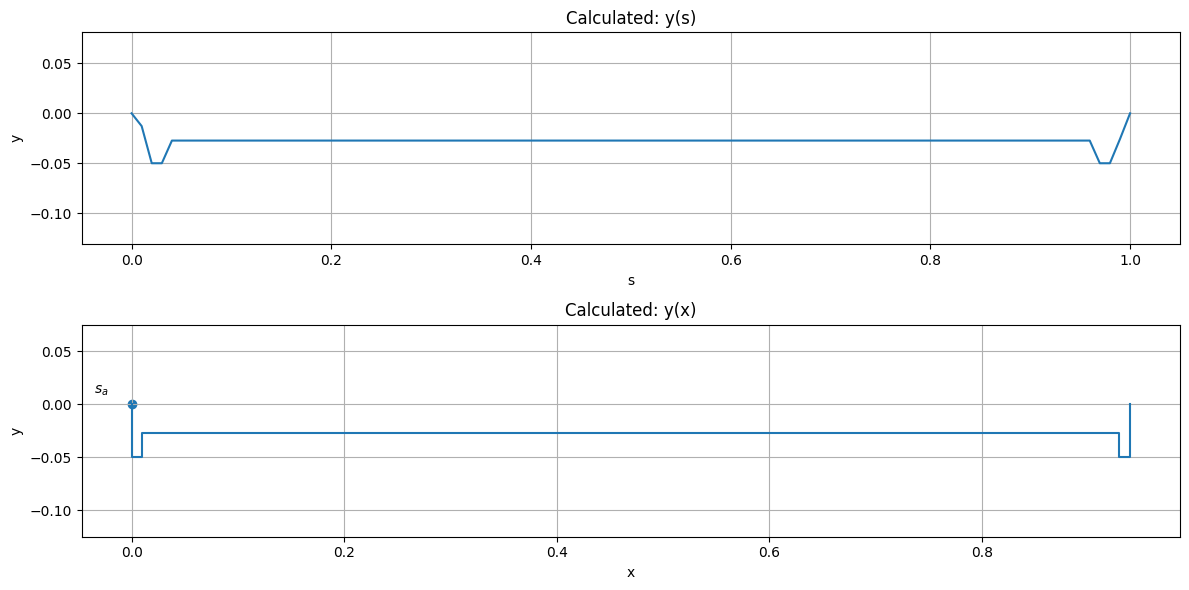

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def compute_xy_from_y_ds(y_coords, ds, x_s_a=0, y_s_a=0):
    """
    Given y-coordinates and arc length spacing ds, compute x and y assuming arc-length spacing.
    Returns x, y starting from (x_s_a, y_s_a).
    """
    y_coords = np.array(y_coords)
    y = y_coords + y_s_a  # offset y if needed
    x = [x_s_a]

    for i in range(1, len(y)):
        dy = y[i] - y[i - 1]
        dx = np.sqrt(max(ds**2 - dy**2, 0))
        x.append(x[-1] + dx)

    return np.array(x), y

def plot_xy_from_y_ds(y_coords2, ds2, x_s_a=0, y_s_a=0):
    """
    Compare two sets of y-coordinates generated with arc length spacing:
    - Left: initial guess (y_coords1, ds1)
    - Right: calculated (y_coords2, ds2)
    """
    x2, y2 = compute_xy_from_y_ds(y_coords2, ds2, x_s_a, y_s_a)

    s2 = np.arange(len(y2)) * ds2

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    # Right: calculated
    axs[0].plot(s2, y2)
    axs[0].set_title("Calculated: y(s)")
    axs[0].set_xlabel("s")
    axs[0].set_ylabel("y")
    axs[0].grid()
    axs[0].axis('equal')

    axs[1].plot(x2, y2)
    axs[1].set_title("Calculated: y(x)")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y")
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].scatter(x_s_a, y_s_a)
    axs[1].annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a - 0.035, y_s_a + 0.01))

    plt.tight_layout()
    plt.show()

def beam_energy(y, ds, E, I_b, Tx):
    n = len(y)

    sum1 = 0
    for i in range(n - 2):
        sum1 += 

    sum2 = 0
    for i in range(n - 1):
        dy = 
        sum2 += np.cos(dy)

    V = E * I_b * sum1 + Tx * (1 - sum2)
    return V

# Parameters
E = 1
I_b = 1
Tx = -3500
length = 1
n = 100
h = 0.05
s, ds = np.linspace(0, length, n, retstep=True)

# Initial guess: parabolic shape
y0 = np.ones(n)

# Optimization
sol = minimize(
    beam_energy,
    y0,
    args=(ds, E, I_b, Tx),
    constraints=([
        {"type": "eq", "fun": lambda y: y[0]},
        {"type": "eq", "fun": lambda y: y[-1]},
    ]),
    options={"maxiter": 300, "disp": True},
    bounds=tuple((-h, h) for _ in range(n))
)

y_min = sol.x

print("Energy:", round(beam_energy(y_min, ds, E, I_b, Tx), 6))
plot_xy_from_y_ds(y_min, ds)